In [73]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from math import *
import pprint

In [74]:
all_data = pd.DataFrame()
for f in glob.glob("./RelatorioQualidadeAguasSuperficiais*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [75]:
all_data

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,10/03/2011,09:55,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
1,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,19/05/2011,11:05,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,20/07/2011,09:40,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
3,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,01/09/2011,10:40,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
4,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,30/11/2011,11:20,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2529,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Benzeno,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2530,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Ens. Ecotoxic. c/ Vibrio fischeri,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2531,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Carbono Orgânico Total,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N


In [76]:
all_data['Parametro'].value_counts()

Ens. Ecotoxic. c/ Vibrio fischeri          56
Nitrogênio-Nitrato                         56
Coloração                                  56
Sólido Dissolvido Total                    56
Carbono Orgânico Total                     56
Turbidez                                   56
Chuvas nas últimas 24h                     56
pH                                         56
Sólido Total                               56
Temperatura da Água                        56
Nitrogênio Amoniacal                       56
Temperatura do Ar                          56
Cloreto Total                              56
Oxigênio Dissolvido                        56
Condutividade                              56
Fósforo Total                              56
Nitrogênio-Nitrito                         55
Crômio Total                               54
Manganês Total                             54
Cádmio Total                               54
Alumínio Dissolvido                        54
Zinco Total                       

In [77]:
clean_data = all_data.drop(columns=['Cod_Interaguas', 'Código Ponto', 'Status Ponto', 'Tipo Rede', 'Período DE', 'Período ATE', 'CLASSE', 'Inicio Operação', 'UF', 'Fim Operação', 'Latitude', 'Longitude', 'Captação', 'Localização', 'Município', 'Tipo de Sistema Hídrico', 'UGRHI', 'Sistema Hídrico', 'Altitude', 'Sinal'])
clean_data['Valor'] = clean_data['Valor'].str.replace(',','.')
res = clean_data[pd.to_numeric(clean_data['Valor'], errors='coerce').notnull()]
res1 = res.copy()
res1['Valor'] = res['Valor'].astype(float)

In [78]:
list_IQA = ['pH', 'Fósforo Total', 'Coliformes Termotolerantes', 'DBO (5, 20)', 'Oxigênio Dissolvido', 'Temperatura da Água', 'Nitrogênio Total', 'Fósforo Total', 'Turbidez', 'Sólido Total']
IQA_table = res1[res1['Parametro'].isin(list_IQA)]
IQA_sem_sol = ['pH', 'Fósforo Total', 'DBO (5, 20)', 'Oxigênio Dissolvido', 'Temperatura da Água', 'Nitrogênio Total', 'Fósforo Total', 'Turbidez']
SS_table = res1[res1['Parametro'].isin(IQA_sem_sol)]

In [79]:
pH_table = res1[res1["Parametro"] == 'pH']
coli_termo_table = res1[res1["Parametro"] == 'Coliformes Termotolerantes']
fosforo_table = res1[res1["Parametro"] == 'Fósforo Total']
O2_table = res1[res1["Parametro"] == 'Oxigênio Dissolvido']
turbidez_table = res1[res1["Parametro"] == 'Turbidez']
DBO_table = res1[res1["Parametro"] == 'DBO (5, 20)']
temp = res1[res1["Parametro"] == 'Temperatura da Água']
nit_total = res1[res1["Parametro"] == 'Nitrogênio Total']
fos_total = res1[res1["Parametro"] == 'Fósforo Total']
sol_total = res1[res1["Parametro"] == 'Sólido Total']
temp_ar = res1[res1["Parametro"] == 'Temperatura do Ar']

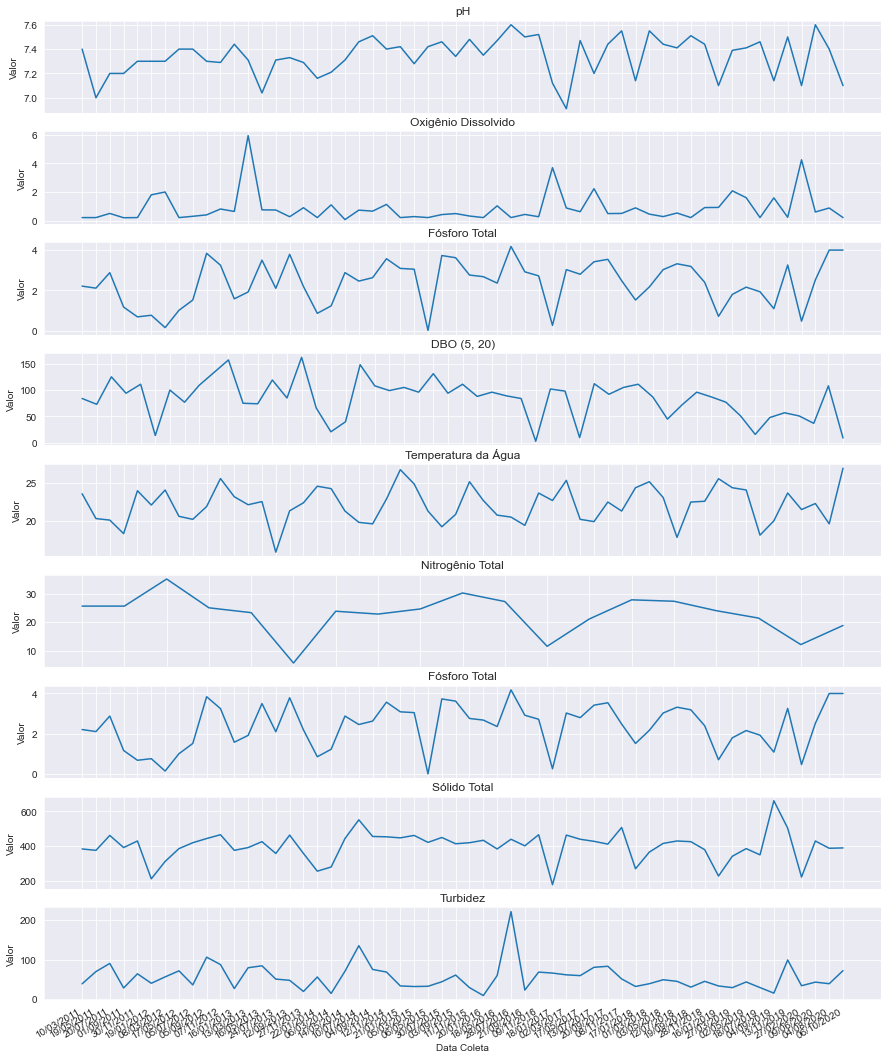

In [80]:
with sns.axes_style("darkgrid"):
    fig, (ax1,ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(15, 20))

    ax1.set_title('pH')
    sns.lineplot(x='Data Coleta', y='Valor', data=pH_table, ax=ax1)

    ax2.set_title('Oxigênio Dissolvido')
    sns.lineplot(x='Data Coleta', y='Valor', data=O2_table, ax=ax2)

    ax3.set_title('Fósforo Total')
    sns.lineplot(x='Data Coleta', y='Valor', data=fosforo_table, ax=ax3)

    ax4.set_title('DBO (5, 20)')
    sns.lineplot(x='Data Coleta', y='Valor', data=DBO_table, ax=ax4)
    
    ax5.set_title('Temperatura da Água')
    sns.lineplot(x='Data Coleta', y='Valor', data=temp, ax=ax5)
    
    ax6.set_title('Nitrogênio Total')
    sns.lineplot(x='Data Coleta', y='Valor', data=nit_total, ax=ax6)
    
    ax7.set_title('Fósforo Total')
    sns.lineplot(x='Data Coleta', y='Valor', data=fos_total, ax=ax7)
    
    ax8.set_title('Sólido Total')
    sns.lineplot(x='Data Coleta', y='Valor', data=sol_total, ax=ax8)
    
    ax9.set_title('Turbidez')
    sns.lineplot(x='Data Coleta', y='Valor', data=turbidez_table, ax=ax9)
    
            
    plt.gcf().autofmt_xdate()
    plt.show()

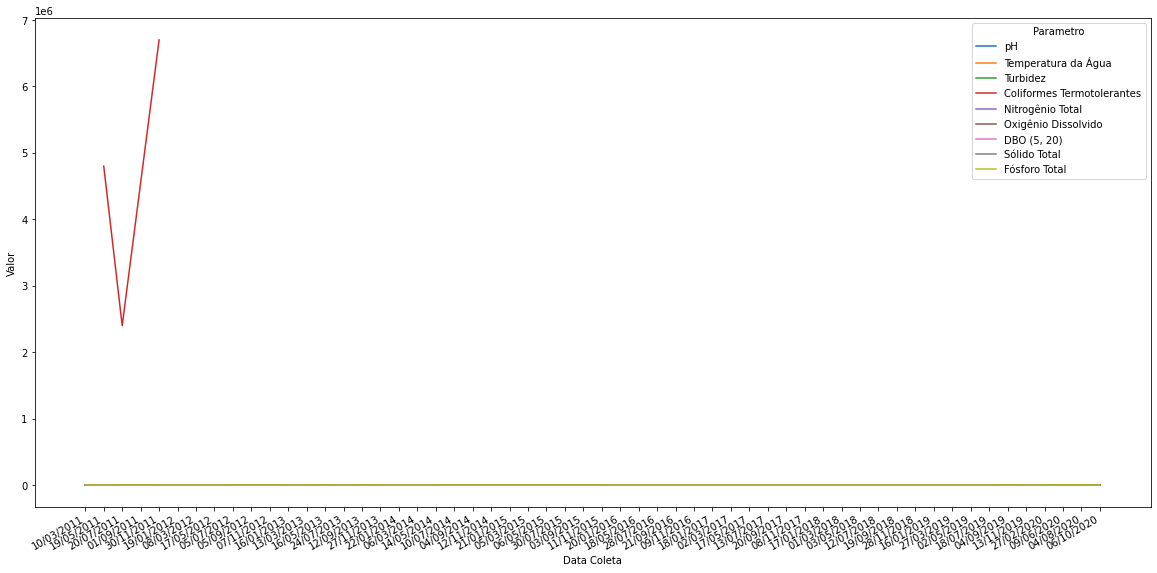

In [81]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(data=IQA_table, x="Data Coleta", y="Valor", hue="Parametro")
plt.gcf().autofmt_xdate()
#plt.savefig('todos_ind.png', dpi=300)
plt.show()

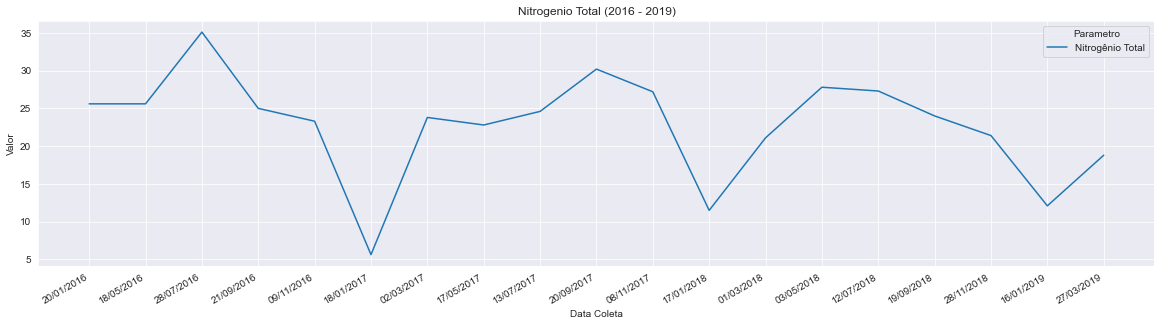

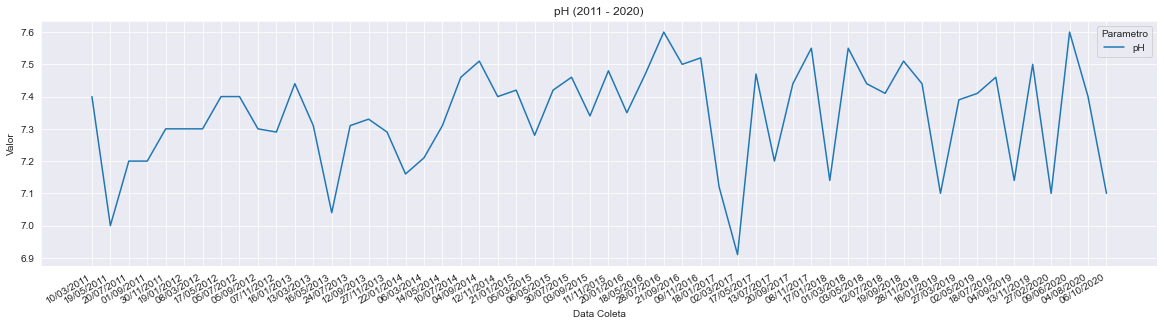

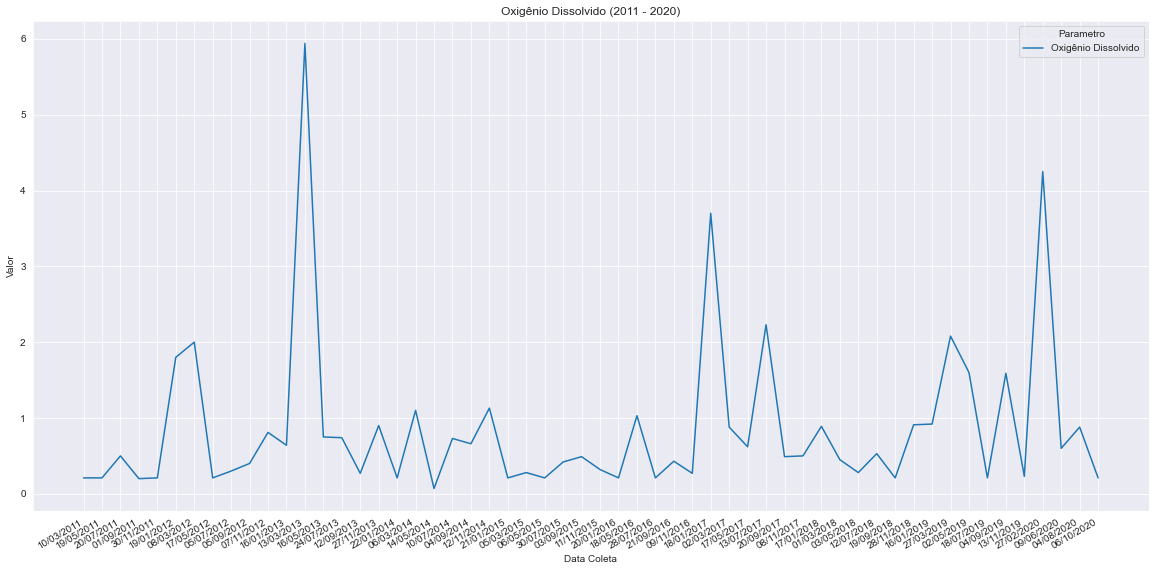

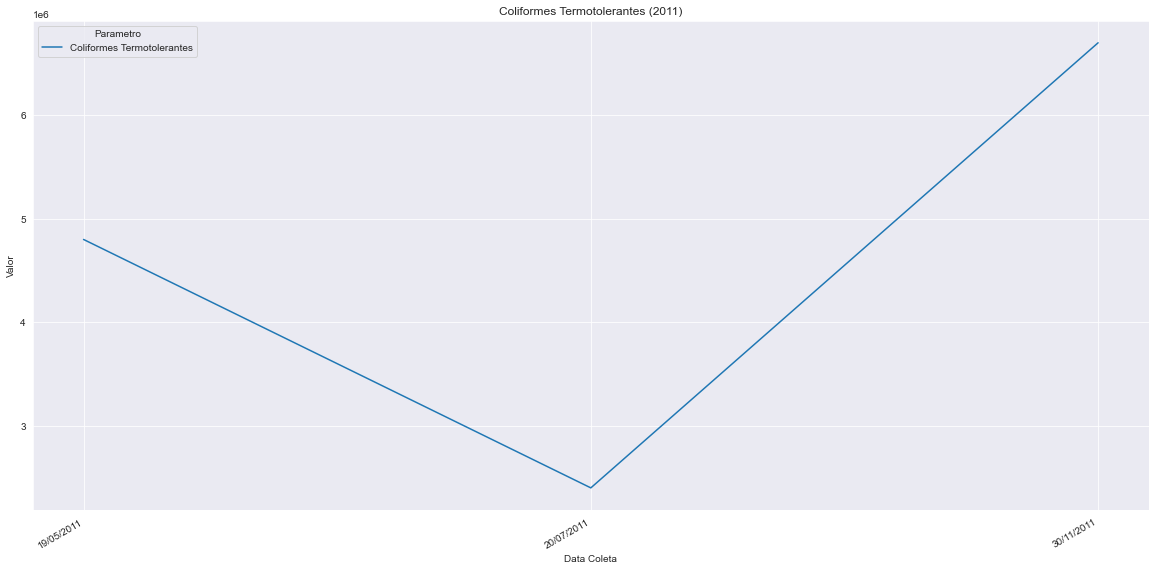

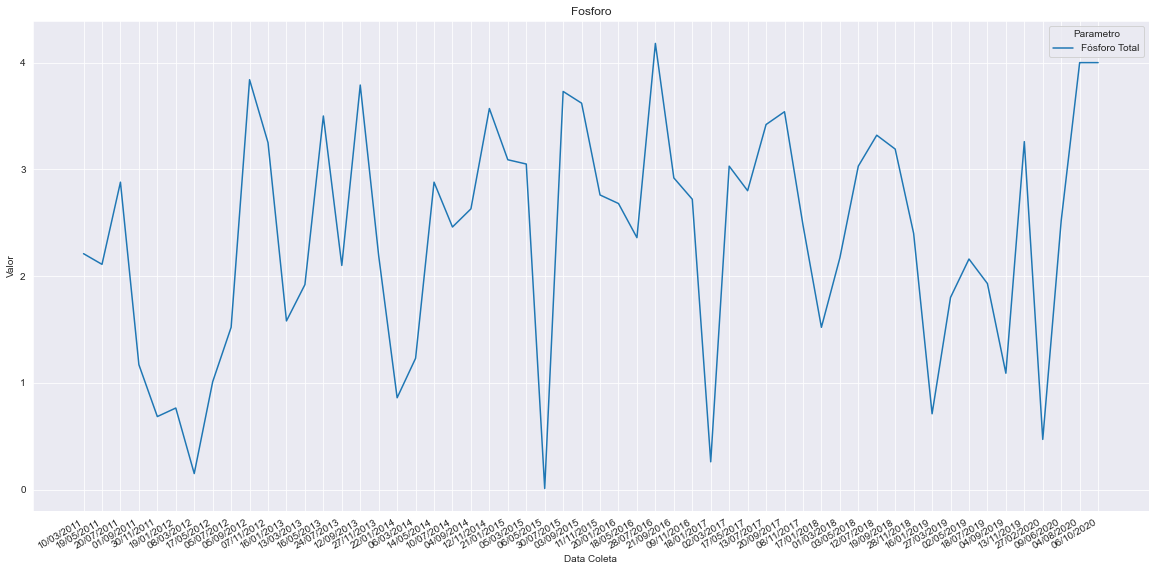

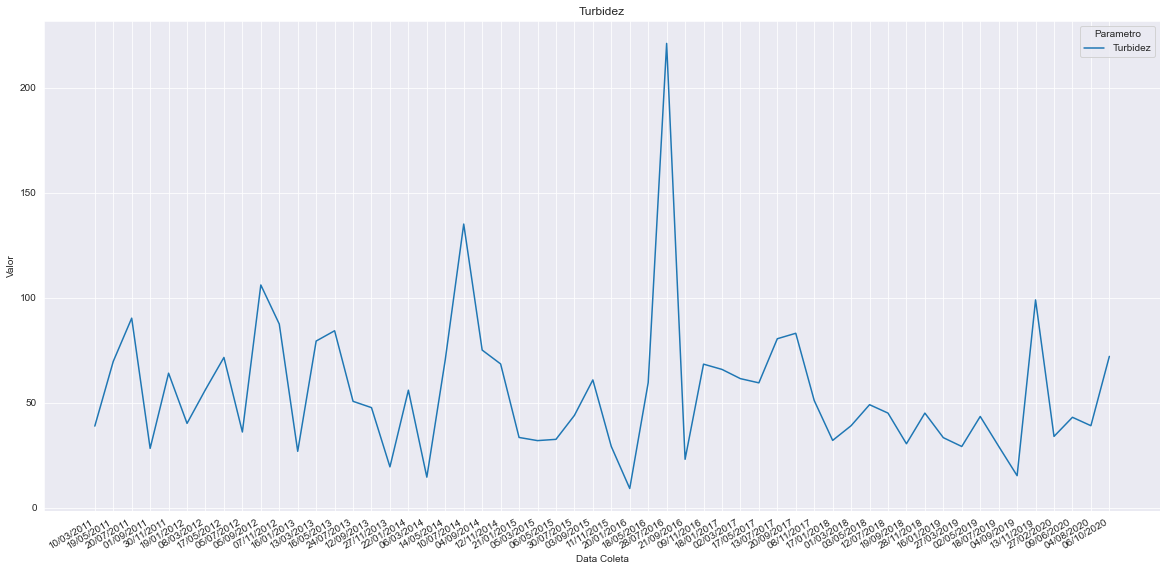

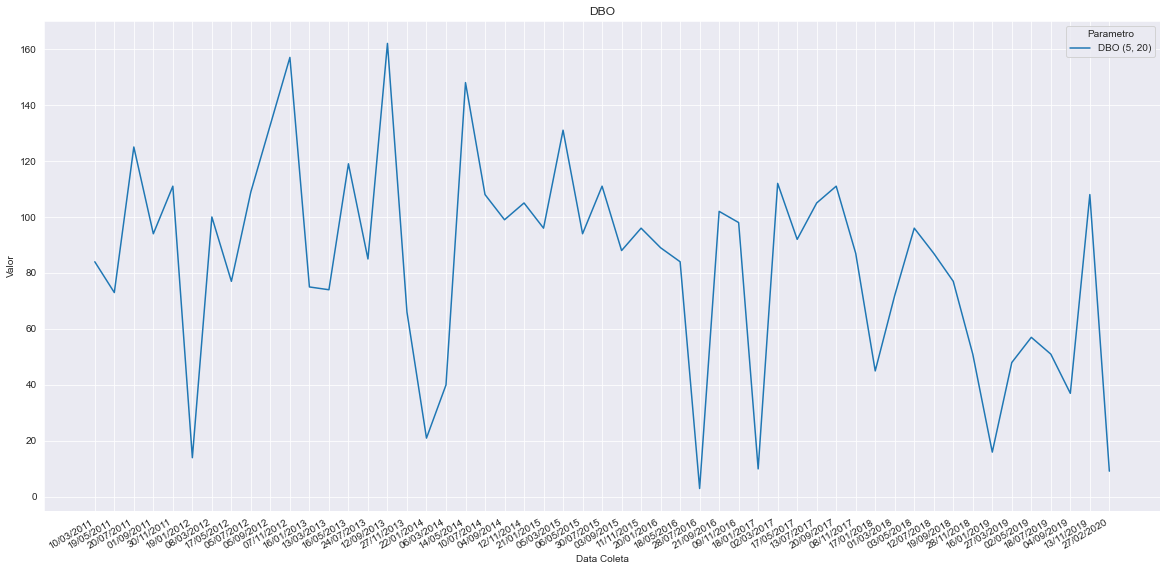

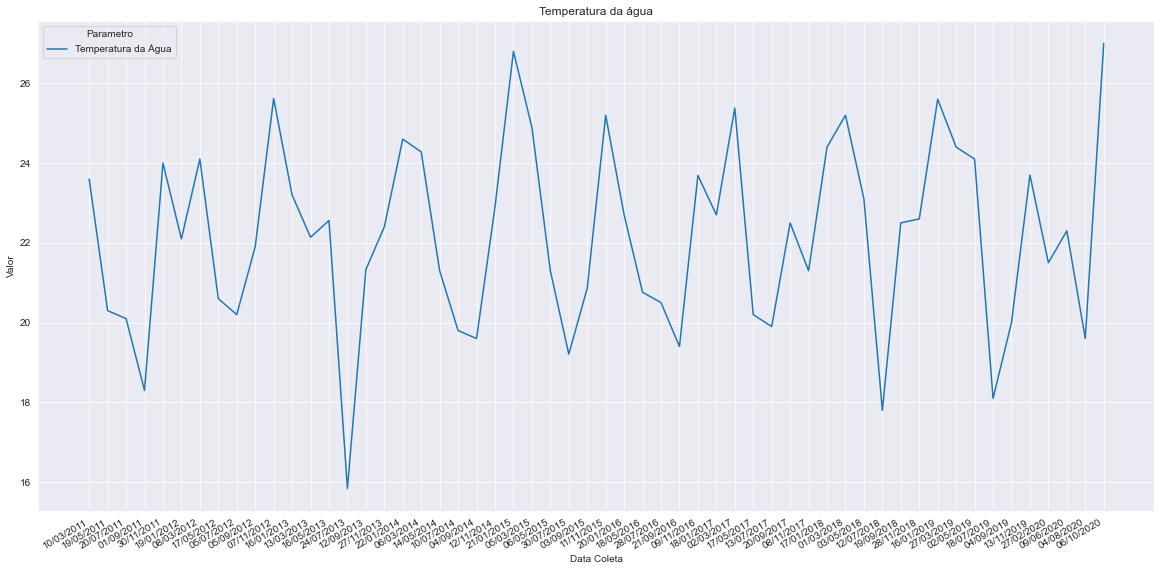

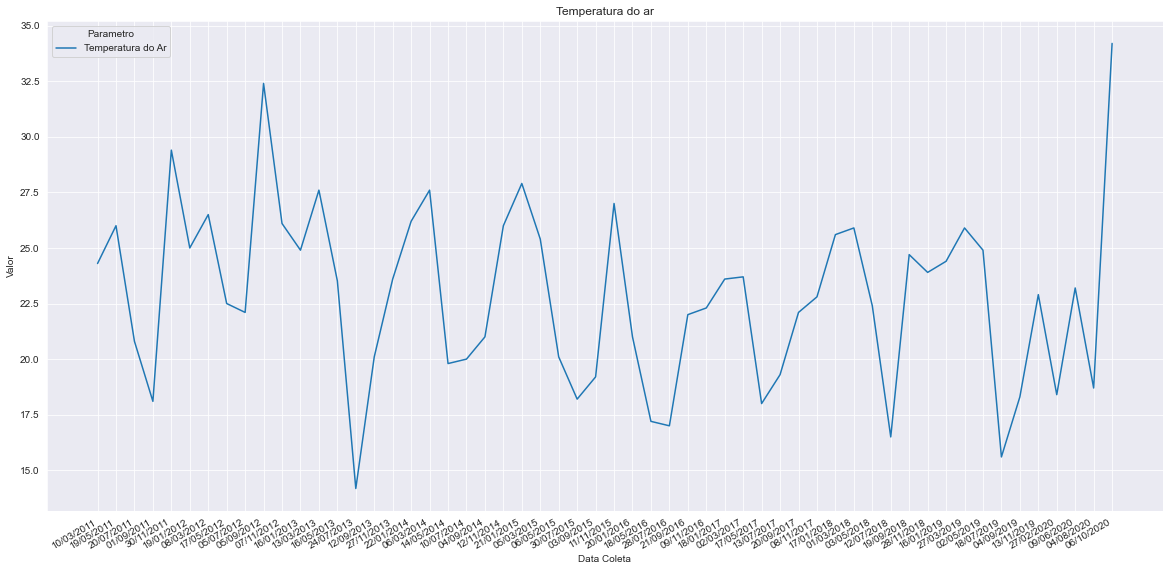

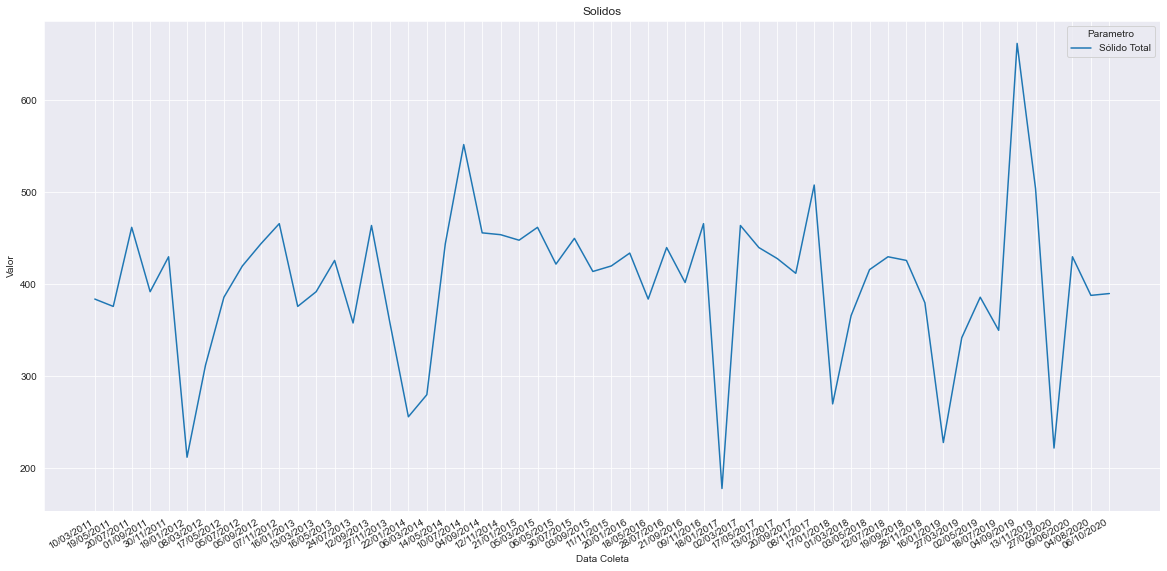

In [82]:
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(111)

    sns.lineplot(data=nit_total, x="Data Coleta", y="Valor", hue="Parametro")
    sns.axes_style("darkgrid")
    plt.gcf().autofmt_xdate()
    plt.title("Nitrogenio Total (2016 - 2019)")
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(111)
    sns.lineplot(data=pH_table, x="Data Coleta", y="Valor", hue="Parametro")
    plt.gcf().autofmt_xdate()

    plt.title("pH (2011 - 2020)")
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=O2_table, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("Oxigênio Dissolvido (2011 - 2020)")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=coli_termo_table, x="Data Coleta", y="Valor", hue="Parametro")
    plt.gcf().autofmt_xdate()

    plt.title("Coliformes Termotolerantes (2011)")
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=fosforo_table, x="Data Coleta", y="Valor", hue="Parametro")
    plt.gcf().autofmt_xdate()

    plt.title("Fosforo")
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=turbidez_table, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("Turbidez")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=DBO_table, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("DBO")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=temp, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("Temperatura da água")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    #plt.show()
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=temp_ar, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("Temperatura do ar")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    plt.show()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.lineplot(data=sol_total, x="Data Coleta", y="Valor", hue="Parametro")

    plt.title("Solidos")
    plt.gcf().autofmt_xdate()
    #plt.savefig('todos_ind.png', dpi=300)
    plt.show()


## Fazendo IQA para 12/07/2018 - 28/11/2018

In [117]:
print(sol_total.values[-11])
print(sol_total.values[-12])
print(sol_total.values[-13])

nit_28_11_18 = nit_total.Valor.values[-3]
nit_19_09_18 = nit_total.Valor.values[-4]
nit_12_07_18 = nit_total.Valor.values[-5]



pH_28_11_18 = pH_table.Valor.values[-11]
pH_19_09_18 = pH_table.Valor.values[-12]
pH_12_07_18 = pH_table.Valor.values[-13]

o2_28_11_18 = O2_table.Valor.values[-11]
o2_19_09_18 = O2_table.Valor.values[-12]
o2_12_07_18 = O2_table.Valor.values[-13]

fosforo_28_11_18 = fosforo_table.Valor.values[-11]
fosforo_19_09_18 = fosforo_table.Valor.values[-12]
fosforo_12_07_18 = fosforo_table.Valor.values[-13]

turbidez_28_11_18 = turbidez_table.Valor.values[-11]
turbidez_19_09_18 = turbidez_table.Valor.values[-12]
turbidez_12_07_18 = turbidez_table.Valor.values[-13]

DBO_28_11_18 = DBO_table.Valor.values[-8]
DBO_19_09_18 = DBO_table.Valor.values[-9]
DBO_12_07_18 = DBO_table.Valor.values[-10]

temp_ar_28_11_18 = temp_ar.Valor.values[-11]
temp_ar_19_09_18 = temp_ar.Valor.values[-12]
temp_ar_12_07_18 = temp_ar.Valor.values[-13]

temp_agua_28_11_18 = temp.Valor.values[-11]
temp_agua_19_09_18 = temp.Valor.values[-12]
temp_agua_12_07_18 = temp.Valor.values[-13]

delta_t_28_11_18 = temp_agua_28_11_18 - temp_ar_28_11_18
delta_t_19_09_18 = temp_agua_19_09_18 - temp_ar_19_09_18
delta_t_12_07_18 = temp_agua_12_07_18 - temp_ar_12_07_18

solidos_28_11_18 = sol_total.Valor.values[-11]
solidos_19_09_18 = sol_total.Valor.values[-12]
solidos_12_07_18 = sol_total.Valor.values[-13]


['28/11/2018' '09:31' 'Sólido Total' 380.0 'mg/L' '2- Físicos']
['19/09/2018' '09:45' 'Sólido Total' 426.0 'mg/L' '2- Físicos']
['12/07/2018' '10:35' 'Sólido Total' 430.0 'mg/L' '2- Físicos']


### para 28_11_18

In [118]:
print(f"nitrogenio 28_11_18: {nit_28_11_18}")
print(f"pH 28_11_18: {pH_28_11_18}")
print(f"O2 28_11_18: {o2_28_11_18}")
print(f"fosforo 28_11_18: {fosforo_28_11_18}")
print(f"turbidez 28_11_18: {turbidez_28_11_18}")
print(f"DBO 28_11_18: {DBO_28_11_18}")
print(f"pH 28_11_18: {pH_28_11_18}")
print(f"deltat 28_11_18: {delta_t_28_11_18}")
print(f"solidos 28_11_18: {solidos_28_11_18}")


nitrogenio 28_11_18: 21.4
pH 28_11_18: 7.44
O2 28_11_18: 0.91
fosforo 28_11_18: 2.4
turbidez 28_11_18: 45.0
DBO 28_11_18: 51.0
pH 28_11_18: 7.44
deltat 28_11_18: -1.2999999999999972
solidos 28_11_18: 380.0


In [119]:
print(f"nitrogenio 19_09_18: {nit_19_09_18}")
print(f"pH 19_09_18: {pH_19_09_18}")
print(f"O2 19_09_18: {o2_19_09_18}")
print(f"fosforo 19_09_18: {fosforo_19_09_18}")
print(f"turbidez 19_09_18: {turbidez_19_09_18}")
print(f"DBO 19_09_18: {DBO_19_09_18}")
print(f"pH 19_09_18: {pH_19_09_18}")
print(f"deltat 19_09_18: {delta_t_19_09_18}")
print(f"solidos 19_09_18: {solidos_19_09_18}")

nitrogenio 19_09_18: 24.0
pH 19_09_18: 7.51
O2 19_09_18: 0.21
fosforo 19_09_18: 3.19
turbidez 19_09_18: 30.4
DBO 19_09_18: 77.0
pH 19_09_18: 7.51
deltat 19_09_18: -2.1999999999999993
solidos 19_09_18: 426.0


In [120]:
print(f"nitrogenio 12_07_18: {nit_12_07_18}")
print(f"pH 12_07_18: {pH_12_07_18}")
print(f"O2 12_07_18: {o2_12_07_18}")
print(f"fosforo 12_07_18: {fosforo_12_07_18}")
print(f"turbidez 12_07_18: {turbidez_12_07_18}")
print(f"DBO 12_07_18: {DBO_12_07_18}")
print(f"pH 12_07_18: {pH_12_07_18}")
print(f"deltat 12_07_18: {delta_t_12_07_18}")
print(f"solidos 12_07_18: {solidos_12_07_18}")

nitrogenio 12_07_18: 27.3
pH 12_07_18: 7.41
O2 12_07_18: 0.53
fosforo 12_07_18: 3.32
turbidez 12_07_18: 45.0
DBO 12_07_18: 87.0
pH 12_07_18: 7.41
deltat 12_07_18: 1.3000000000000007
solidos 12_07_18: 430.0


In [131]:
#iqa fosforo
fosforo_iqa_28_11_18 = 24.1
fosforo_iqa_19_09_18 =17.51
fosforo_iqa_12_07_18 = 17.21

nit_iqa_28_11_18 = 32.8
nit_iqa_19_09_18 = 30.14
nit_iqa_12_07_18 = 27.45

o2_iqa_28_11_18 = 94.24
o2_iqa_19_09_18 = 15.11
o2_iqa_12_07_18 = 45.00

pH_iqa_28_11_18 = 92.38
pH_iqa_19_09_18 = 91.72
pH_iqa_12_07_18 = 92.38

turbidez_iqa_28_11_18 = 41.04
turbidez_iqa_19_09_18 = 51.72
turbidez_iqa_12_07_18 = 41.04

DBO_iqa_28_11_18 = 2
DBO_iqa_19_09_18 = 2
DBO_iqa_12_07_18 = 2

delta_t_iqa_28_11_18 = 85.19
delta_t_iqa_19_09_18 = 79.27
delta_t_iqa_12_07_18 = 85.19

solidos_iqa_28_11_18 = 50.07
solidos_iqa_19_09_18 = 42.80
solidos_iqa_12_07_18 = 41.81

### iqa 28_11_18

In [132]:
lista_iqa = [fosforo_iqa_28_11_18,w_FT,pH_iqa_28_11_18,w_pH,o2_iqa_28_11_18,w_O2,turbidez_iqa_28_11_18,w_TU,DBO_iqa_28_11_18,
             w_DBO,delta_t_iqa_28_11_18,w_DT,nit_iqa_28_11_18,w_NT,solidos_iqa_28_11_18,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_28_11_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_28_11_18)

22.35852232390897


### iqa 19_09_18

In [133]:
lista_iqa = [fosforo_iqa_19_09_18,w_FT,pH_iqa_19_09_18,w_pH,o2_iqa_19_09_18,w_O2,turbidez_iqa_19_09_18,w_TU,DBO_iqa_19_09_18,
             w_DBO,delta_t_iqa_19_09_18,w_DT,nit_iqa_19_09_18,w_NT,solidos_iqa_19_09_18,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_19_09_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_19_09_18)

15.697686520857175


### 12_07_18

In [134]:
lista_iqa = [fosforo_iqa_12_07_18,w_FT,pH_iqa_12_07_18,w_pH,o2_iqa_12_07_18,w_O2,turbidez_iqa_12_07_18,w_TU,DBO_iqa_12_07_18,
             w_DBO,delta_t_iqa_12_07_18,w_DT,nit_iqa_12_07_18,w_NT,solidos_iqa_12_07_18,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_12_07_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_12_07_18)

18.46072135639641


In [101]:
zeroData = IQA_table[IQA_table["Data Coleta"] == '10/03/2011']
firstData = IQA_table[IQA_table["Data Coleta"] == '19/05/2011']
secondData = IQA_table[IQA_table["Data Coleta"] == '20/01/2016']
thirdData = IQA_table[IQA_table["Data Coleta"] == '27/02/2020']

['28/11/2018' '09:31' 'Nitrogênio Total' 21.4 'mg/L' '3- Químicos']


In [85]:
zeroData

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro
0,10/03/2011,09:55,pH,7.40,U.pH,3- Químicos
30,10/03/2011,09:55,Temperatura da Água,23.60,ºC,2- Físicos
288,10/03/2011,09:55,Turbidez,38.80,UNT,2- Físicos
1014,10/03/2011,09:55,Oxigênio Dissolvido,0.21,mg/L,3- Químicos
1044,10/03/2011,09:55,"DBO (5, 20)",84.00,mg/L,3- Químicos
1104,10/03/2011,09:55,Sólido Total,384.00,mg/L,2- Físicos
1194,10/03/2011,09:55,Fósforo Total,2.21,mg/L,3- Químicos


In [86]:
firstData

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro
1,19/05/2011,11:05,pH,7.00,U.pH,3- Químicos
31,19/05/2011,11:05,Temperatura da Água,20.30,ºC,2- Físicos
289,19/05/2011,11:05,Turbidez,69.60,UNT,2- Físicos
561,19/05/2011,11:05,Coliformes Termotolerantes,4800000.00,UFC/100mL,4- Microbiológicos
1015,19/05/2011,11:05,Oxigênio Dissolvido,0.21,mg/L,3- Químicos
1045,19/05/2011,11:05,"DBO (5, 20)",73.00,mg/L,3- Químicos
1105,19/05/2011,11:05,Sólido Total,376.00,mg/L,2- Físicos
1195,19/05/2011,11:05,Fósforo Total,2.11,mg/L,3- Químicos


In [87]:
secondData

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro
29,20/01/2016,09:25,pH,7.35,U.pH,3- Químicos
59,20/01/2016,09:25,Temperatura da Água,22.70,ºC,2- Físicos
317,20/01/2016,09:25,Turbidez,9.10,UNT,2- Físicos
825,20/01/2016,09:25,Nitrogênio Total,25.60,mg/L,3- Químicos
1043,20/01/2016,09:25,Oxigênio Dissolvido,0.21,mg/L,3- Químicos
1073,20/01/2016,09:25,"DBO (5, 20)",89.00,mg/L,3- Químicos
1133,20/01/2016,09:25,Sólido Total,434.00,mg/L,2- Físicos
1223,20/01/2016,09:25,Fósforo Total,2.68,mg/L,3- Químicos


In [88]:
thirdData

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro
2390,27/02/2020,10:03,pH,7.10,U.pH,3- Químicos
2391,27/02/2020,10:03,Temperatura da Água,21.50,ºC,2- Físicos
2395,27/02/2020,10:03,Oxigênio Dissolvido,4.25,mg/L,3- Químicos
2414,27/02/2020,10:03,Turbidez,33.90,UNT,2- Físicos
2418,27/02/2020,10:03,"DBO (5, 20)",9.19,mg/L,3- Químicos
2420,27/02/2020,10:03,Sólido Total,222.00,mg/L,2- Físicos
2424,27/02/2020,10:03,Fósforo Total,0.47,mg/L,3- Químicos


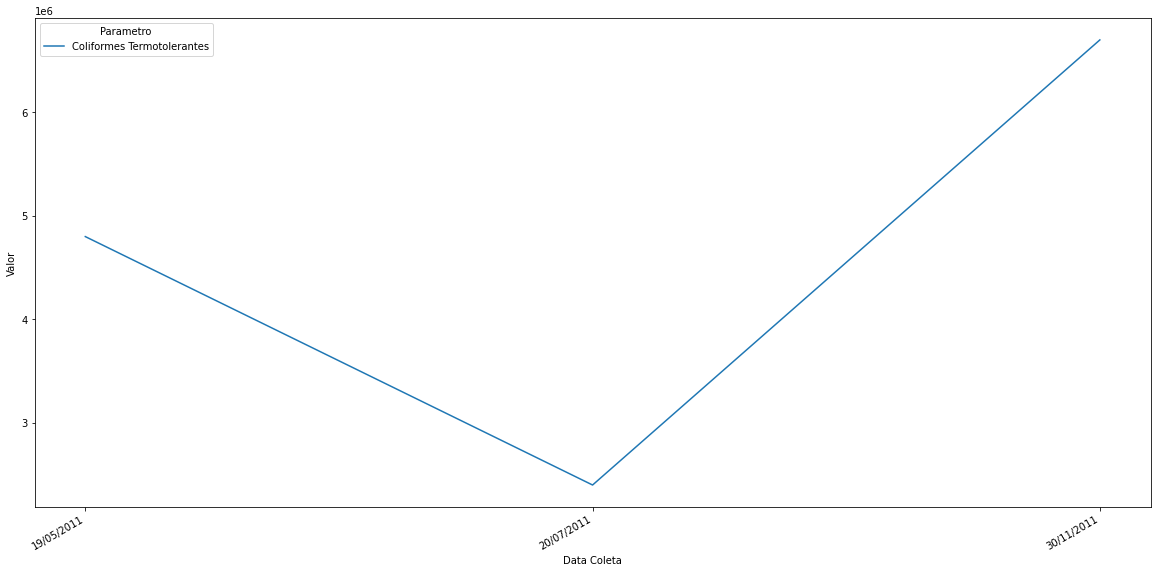

In [89]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(data=coli_termo_table, x="Data Coleta", y="Valor", hue="Parametro")
plt.gcf().autofmt_xdate()
#plt.savefig('todos_ind.png', dpi=300)
plt.show()

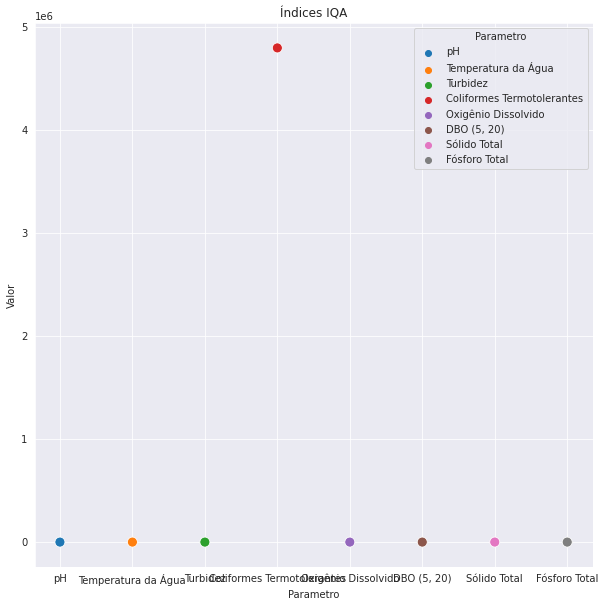

In [90]:
with sns.axes_style("darkgrid"):
    fig, (ax1) = plt.subplots(1,1, figsize=(10,10))

    ax1.set_title('Índices IQA')
    sns.scatterplot(x='Parametro', y='Valor', hue="Parametro", data=firstData, ax=ax1, s=100)

### Gráficos dos parâmetros do IQA
<img src="Graficos.png">

### Cálculo do IQA

In [91]:
w_O2 = 0.17
w_coli = 0.15
w_pH = 0.12
w_DBO = 0.10
w_DT = 0.10
w_NT = 0.10
w_FT = 0.10
w_TU = 0.08
w_ST = 0.08

In [92]:
coli_termo_table = res1[res1["Parametro"] == 'Coliformes Termotolerantes']
fosforo_table = res1[res1["Parametro"] == 'Fósforo Total']
O2_table = res1[res1["Parametro"] == 'Oxigênio Dissolvido']
turbidez_table = res1[res1["Parametro"] == 'Turbidez']
DBO_table = res1[res1["Parametro"] == 'DBO (5, 20)']
temp = res1[res1["Parametro"] == 'Temperatura da Água']
nit_total = res1[res1["Parametro"] == 'Nitrogênio Total']
fos_total = res1[res1["Parametro"] == 'Fósforo Total']
sol_total = res1[res1["Parametro"] == 'Sólido Total']

In [93]:
coli = 1

In [94]:
def calc_qta(q_O2, q_CF, q_pH, q_DBO, q_NT, q_TU, q_DT, q_ST,q_FT):
    f_O2 = 100.8*math.exp(((q_O2 - 106)**2)/-3745)
    f_CF = 98.03 - 36.45*log(q_CF) + 3.138*log10(q_CF)**2 + 0.06776*log10(q_CF)**2
    f_pH = 0.05421*q_pH**(1.23*q_pH -0.09873*q_pH**2) + 5.213
    f_DBO = 102.6*math.exp(-0.1101*q_DBO)
    f_FT = 213.7*math.exp(-1.680*(q_FT)**0.3325)
    f_NT = 98.96*q_NT**(-0.2232-0.006457*q_NT)
    f_TU = 97.34*math.exp(-0.01139*q_TU - 0.04917*sqrt(q_TU))
    f_delta_T = 1/(0.0003869*(q_DT + 0.1815)**2 + 0.01081)
    f_ST = 80.26*math.exp(-0.00107*q_ST + 0.03009*sqrt(q_ST)) - 0.1185*q_ST
    
    res_O2 = f_O2**w_O2
    #res_CF = f_CF**w_CF
    res_CF = 1
    res_pH = f_pH**w_pH
    res_DBO = f_DBO**w_DBO
    res_FT = f_FT**w_FT
    res_NT = f_NT**w_NT
    res_TU = f_TU**w_TU
    res_DT = f_delta_T**w_DT
    res_ST = f_ST**w_ST
    
    iqa = res_O2*res_CF*res_pH*res_DBO*res_FT*res_NT*res_TU*res_DT*res_ST
    return iqa
calc_qta(10,1,7.2,9,19,72,7.5,390,4)
    


16.76037528746809

### Calculando IQA para ultimo registro (06/10/2020)
#### Fósforo
<img src="img/fosforo_2020.png">

#### PH
<img src="img/ph_2020.png">

#### Oxigênio
<img src="img/oxigenio_2020.png">

#### Turbidez
<img src="img/turbidez_2020.png">

#### DBO
<img src="img/dbo_2020.png">

#### temp
<img src="img/temperatura_2020.png">

#### Nitrogenio (2019)
<img src="img/nitrogenio_2019.png">

#### Residuos
<img src="img/residuo_2020.png">


In [95]:

fosforo_iqa = 15
ph_iqa =91
o2_iqa = 12
turbidez_iqa = 27
dbo_iqa = 35
temp_iqa = 32
nitrogenio_iqa = 37
residuo_iqa = 50



lista_iqa = [fosforo_iqa,w_FT,ph_iqa,w_pH,o2_iqa,w_O2,turbidez_iqa,w_TU,dbo_iqa,
             w_DBO,temp_iqa,w_DT,nitrogenio_iqa,w_NT,residuo_iqa,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_por_imagem=calcula_iqa_por_lista(lista_iqa)
calc_por_eq=calc_qta(10,1,7.2,9,19,72,7.5,390,4)
print(f"IQA por imagem: {iqa_por_imagem}\nIQA por equação: {calc_por_eq}\nDiferença de {iqa_por_imagem-calc_por_eq}")

IQA por imagem: 17.714283096369815
IQA por equação: 16.76037528746809
Diferença de 0.9539078089017252


#### Sem nitrogênio

In [96]:

nitrogenio_iqa = 1
lista_iqa = [fosforo_iqa,w_FT,ph_iqa,w_pH,o2_iqa,w_O2,turbidez_iqa,w_TU,dbo_iqa,
             w_DBO,temp_iqa,w_DT,1,w_NT,residuo_iqa,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
calcula_iqa_por_lista(lista_iqa)

12.345350043765926

In [97]:
lista_parametro= ['pH', 'Coliformes Termotolerantes','Fósforo Total','Oxigênio Dissolvido','Turbidez', 'DBO (5, 20)',
                 'Temperatura da Água','Nitrogênio Total','Fósforo Total','Sólido Total','']
res2 = res1
res2[res2["Parametro"]] = res2["Valor"]
res2

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro,pH,Temperatura da Água,Temperatura do Ar,Escherichia coli**,...,Potássio,Cálcio Total,Magnésio Total,Carbono Orgânico Dissolvido,Fluoreto Total,Dureza,Fósforo-Ortofosfato,Sulfato Total,Profundidade da Coleta,Sólido Suspenso Total
0,10/03/2011,09:55,pH,7.40,U.pH,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
1,19/05/2011,11:05,pH,7.00,U.pH,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
2,20/07/2011,09:40,pH,7.20,U.pH,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
3,01/09/2011,10:40,pH,7.20,U.pH,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
4,30/11/2011,11:20,pH,7.30,U.pH,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,06/10/2020,15:12,Chumbo Total,0.01,mg/L,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
2529,06/10/2020,15:12,Benzeno,2.50,µg/L,Compostos Orgânicos Voláteis (COVs),7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
2530,06/10/2020,15:12,Ens. Ecotoxic. c/ Vibrio fischeri,3.04,EC20(%),6- Ecotoxicológicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0
2531,06/10/2020,15:12,Carbono Orgânico Total,43.30,mg/L,3- Químicos,7.1,27.0,34.2,3500000.0,...,14.0,21.0,4.0,16.4,0.7,65.8,2.0,36.0,0.0,100.0


In [98]:
#